**Using the website having History of India and using NLP to extract text and Analysing the same**

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
ip = []
url="https://www.culturalindia.net/indian-history/"
response = requests.get(url)
soup = BeautifulSoup(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.find_all(attrs={"class","text"})# Extracting the content under specific tags  
for i in range(len(reviews)):
    ip.append(reviews[i].text)  


In [3]:
text = []

text = text + ip

In [4]:
text

["\nIndia is a land of ancient civilization. India's social, economic, and cultural configurations are the products of a long process of regional expansion. Indian history begins with the birth of the Indus Valley Civilization and the coming of the Aryans. These two phases are usually described as the pre-Vedic and Vedic age. Hinduism arose in the Vedic period.\xa0\nThe fifth century saw the unification of India under Ashoka, who had converted to Buddhism, and it is in his reign that Buddhism spread in many parts of Asia. In the eighth century Islam came to India for the first time and by the eleventh century had firmly established itself in India as a political force. It resulted into the formation of the Delhi Sultanate, which was finally succeeded by the Mughal Empire, under which India once again achieved a large measure of political unity.\xa0\nIt was in the 17th century that the Europeans came to India. This coincided with the disintegration of the Mughal Empire, paving the way f

In [5]:
# Joinining all the text into a single paragraph in string format for ease of working
ip_rev_string = " ".join(text)
ntext = ip_rev_string

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in ntext.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

In [6]:
import nltk
# from nltk.corpus import stopwords
import re
# Removing unwanted symbols incase if exists
text = re.sub("[^A-Za-z" "]+"," ", text).lower()
text = re.sub("[0-9" "]+"," ", text)


In [7]:
# words contained in the text
text_words = text.split(" ")

from nltk.corpus import stopwords

stop_words = stopwords.words('English') # 179 pre defined stop words

# Filtering stop words from the input string
sentence_no_stops = ' '.join([word for word in text_words if word not in stop_words]) 

In [8]:
sentence_no_stops

'india land ancient civilization india social economic cultural configurations products long process regional expansion indian history begins birth indus valley civilization coming aryans two phases usually described pre vedic vedic age hinduism arose vedic period fifth century saw unification india ashoka converted buddhism reign buddhism spread many parts asia eighth century islam came india first time eleventh century firmly established india political force resulted formation delhi sultanate finally succeeded mughal empire india achieved large measure political unity th century europeans came india coincided disintegration mughal empire paving way regional states contest supremacy english emerged victors rebellion sought restore indian supremacy crushed subsequent crowning victoria empress india incorporation india empire complete followed india struggle independence got year india timeline indian timeline takes us journey history subcontinent right ancient india included banglades

**Creating a Wordcloud of the cleansed data text**

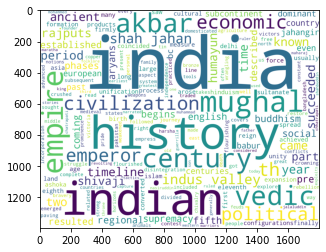

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(sentence_no_stops)

plt.imshow(wordcloud_ip)

In [10]:
from textblob import TextBlob

blob = TextBlob(sentence_no_stops)

blob.ngrams(n = 2)

[WordList(['india', 'land']),
 WordList(['land', 'ancient']),
 WordList(['ancient', 'civilization']),
 WordList(['civilization', 'india']),
 WordList(['india', 'social']),
 WordList(['social', 'economic']),
 WordList(['economic', 'cultural']),
 WordList(['cultural', 'configurations']),
 WordList(['configurations', 'products']),
 WordList(['products', 'long']),
 WordList(['long', 'process']),
 WordList(['process', 'regional']),
 WordList(['regional', 'expansion']),
 WordList(['expansion', 'indian']),
 WordList(['indian', 'history']),
 WordList(['history', 'begins']),
 WordList(['begins', 'birth']),
 WordList(['birth', 'indus']),
 WordList(['indus', 'valley']),
 WordList(['valley', 'civilization']),
 WordList(['civilization', 'coming']),
 WordList(['coming', 'aryans']),
 WordList(['aryans', 'two']),
 WordList(['two', 'phases']),
 WordList(['phases', 'usually']),
 WordList(['usually', 'described']),
 WordList(['described', 'pre']),
 WordList(['pre', 'vedic']),
 WordList(['vedic', 'vedic']

In [11]:
blob.ngrams(n = 3)

[WordList(['india', 'land', 'ancient']),
 WordList(['land', 'ancient', 'civilization']),
 WordList(['ancient', 'civilization', 'india']),
 WordList(['civilization', 'india', 'social']),
 WordList(['india', 'social', 'economic']),
 WordList(['social', 'economic', 'cultural']),
 WordList(['economic', 'cultural', 'configurations']),
 WordList(['cultural', 'configurations', 'products']),
 WordList(['configurations', 'products', 'long']),
 WordList(['products', 'long', 'process']),
 WordList(['long', 'process', 'regional']),
 WordList(['process', 'regional', 'expansion']),
 WordList(['regional', 'expansion', 'indian']),
 WordList(['expansion', 'indian', 'history']),
 WordList(['indian', 'history', 'begins']),
 WordList(['history', 'begins', 'birth']),
 WordList(['begins', 'birth', 'indus']),
 WordList(['birth', 'indus', 'valley']),
 WordList(['indus', 'valley', 'civilization']),
 WordList(['valley', 'civilization', 'coming']),
 WordList(['civilization', 'coming', 'aryans']),
 WordList(['com

**Word Tokenizer**

In [12]:
words=nltk.word_tokenize(sentence_no_stops)
words

['india',
 'land',
 'ancient',
 'civilization',
 'india',
 'social',
 'economic',
 'cultural',
 'configurations',
 'products',
 'long',
 'process',
 'regional',
 'expansion',
 'indian',
 'history',
 'begins',
 'birth',
 'indus',
 'valley',
 'civilization',
 'coming',
 'aryans',
 'two',
 'phases',
 'usually',
 'described',
 'pre',
 'vedic',
 'vedic',
 'age',
 'hinduism',
 'arose',
 'vedic',
 'period',
 'fifth',
 'century',
 'saw',
 'unification',
 'india',
 'ashoka',
 'converted',
 'buddhism',
 'reign',
 'buddhism',
 'spread',
 'many',
 'parts',
 'asia',
 'eighth',
 'century',
 'islam',
 'came',
 'india',
 'first',
 'time',
 'eleventh',
 'century',
 'firmly',
 'established',
 'india',
 'political',
 'force',
 'resulted',
 'formation',
 'delhi',
 'sultanate',
 'finally',
 'succeeded',
 'mughal',
 'empire',
 'india',
 'achieved',
 'large',
 'measure',
 'political',
 'unity',
 'th',
 'century',
 'europeans',
 'came',
 'india',
 'coincided',
 'disintegration',
 'mughal',
 'empire',
 'paving

**Words POS tagging**

In [13]:
import nltk
nltk.download('averaged_perceptron_tagger')
pos_tags=nltk.pos_tag(words)
pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bikem\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('india', 'JJ'),
 ('land', 'NN'),
 ('ancient', 'JJ'),
 ('civilization', 'NN'),
 ('india', 'VBZ'),
 ('social', 'JJ'),
 ('economic', 'JJ'),
 ('cultural', 'JJ'),
 ('configurations', 'NNS'),
 ('products', 'NNS'),
 ('long', 'RB'),
 ('process', 'JJ'),
 ('regional', 'JJ'),
 ('expansion', 'NN'),
 ('indian', 'JJ'),
 ('history', 'NN'),
 ('begins', 'VBZ'),
 ('birth', 'JJ'),
 ('indus', 'JJ'),
 ('valley', 'NN'),
 ('civilization', 'NN'),
 ('coming', 'VBG'),
 ('aryans', 'NNS'),
 ('two', 'CD'),
 ('phases', 'NNS'),
 ('usually', 'RB'),
 ('described', 'VBD'),
 ('pre', 'JJ'),
 ('vedic', 'JJ'),
 ('vedic', 'JJ'),
 ('age', 'NN'),
 ('hinduism', 'NN'),
 ('arose', 'JJ'),
 ('vedic', 'JJ'),
 ('period', 'NN'),
 ('fifth', 'JJ'),
 ('century', 'NN'),
 ('saw', 'VBD'),
 ('unification', 'JJ'),
 ('india', 'NN'),
 ('ashoka', 'NN'),
 ('converted', 'VBD'),
 ('buddhism', 'NN'),
 ('reign', 'NN'),
 ('buddhism', 'NN'),
 ('spread', 'VBD'),
 ('many', 'JJ'),
 ('parts', 'NNS'),
 ('asia', 'VBP'),
 ('eighth', 'JJ'),
 ('century', 'NN

In [14]:
import nltk
nltk.download('maxent_ne_chunker')
import nltk
nltk.download('words')
chunks=nltk.ne_chunk(pos_tags,binary=False)
for chunk in chunks:
    print(chunk)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\bikem\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\bikem\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


('india', 'JJ')
('land', 'NN')
('ancient', 'JJ')
('civilization', 'NN')
('india', 'VBZ')
('social', 'JJ')
('economic', 'JJ')
('cultural', 'JJ')
('configurations', 'NNS')
('products', 'NNS')
('long', 'RB')
('process', 'JJ')
('regional', 'JJ')
('expansion', 'NN')
('indian', 'JJ')
('history', 'NN')
('begins', 'VBZ')
('birth', 'JJ')
('indus', 'JJ')
('valley', 'NN')
('civilization', 'NN')
('coming', 'VBG')
('aryans', 'NNS')
('two', 'CD')
('phases', 'NNS')
('usually', 'RB')
('described', 'VBD')
('pre', 'JJ')
('vedic', 'JJ')
('vedic', 'JJ')
('age', 'NN')
('hinduism', 'NN')
('arose', 'JJ')
('vedic', 'JJ')
('period', 'NN')
('fifth', 'JJ')
('century', 'NN')
('saw', 'VBD')
('unification', 'JJ')
('india', 'NN')
('ashoka', 'NN')
('converted', 'VBD')
('buddhism', 'NN')
('reign', 'NN')
('buddhism', 'NN')
('spread', 'VBD')
('many', 'JJ')
('parts', 'NNS')
('asia', 'VBP')
('eighth', 'JJ')
('century', 'NN')
('islam', 'NN')
('came', 'VBD')
('india', 'RB')
('first', 'JJ')
('time', 'NN')
('eleventh', 'JJ')


**Using Spacy to find the Named Entities in the text**

In [15]:
!python -m spacy download en_core_web_sm 

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [16]:
import spacy
nlp=spacy.load('en_core_web_sm')

nlp.pipe_names


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [17]:
text3= nlp(sentence_no_stops)

In [18]:
from spacy import displacy
displacy.render(text3, style="ent",jupyter=True)

**Bigram Frequency**

In [19]:
import nltk

def compute_freq(sentence_no_stops, n_value=2):

    tokens = nltk.word_tokenize(sentence_no_stops)
    ngrams = nltk.ngrams(tokens, n_value)
    ngram_fdist = nltk.FreqDist(ngrams)
    return ngram_fdist

In [20]:
freq_dist = compute_freq(sentence_no_stops)

In [21]:
freq_dist

FreqDist({('indus', 'valley'): 4, ('mughal', 'empire'): 4, ('shah', 'jahan'): 4, ('indian', 'history'): 3, ('valley', 'civilization'): 3, ('civilization', 'coming'): 2, ('coming', 'aryans'): 2, ('aryans', 'two'): 2, ('two', 'phases'): 2, ('described', 'pre'): 2, ...})

**Trigram Frequency**

In [22]:
import nltk

def compute_freq(sentence_no_stops, n_value = 3):

    tokens = nltk.word_tokenize(sentence_no_stops)
    ngrams = nltk.ngrams(tokens, n_value)
    ngram_fdist = nltk.FreqDist(ngrams)
    return ngram_fdist

In [23]:
freq_dist2 = compute_freq(sentence_no_stops)
freq_dist2

FreqDist({('indus', 'valley', 'civilization'): 3, ('valley', 'civilization', 'coming'): 2, ('civilization', 'coming', 'aryans'): 2, ('coming', 'aryans', 'two'): 2, ('aryans', 'two', 'phases'): 2, ('described', 'pre', 'vedic'): 2, ('pre', 'vedic', 'vedic'): 2, ('india', 'land', 'ancient'): 1, ('land', 'ancient', 'civilization'): 1, ('ancient', 'civilization', 'india'): 1, ...})